In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
data = pd.read_csv("C:/Users/Rahila/Downloads/online_retail.csv")

In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
# Check for nulls
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
data.duplicated().sum()

5268

In [15]:
data.shape

(541909, 8)

In [17]:
data.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [19]:
numerical_cols = data.select_dtypes(exclude='object').columns
numerical_cols

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

In [23]:
#Check for unusual records (optional example: negative values)
print("Checking for potential unusual values (negative in numeric columns):")
numeric_cols = data.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if (data[col] < 0).any():
        print(f"Column '{col}' has negative values.")

Checking for potential unusual values (negative in numeric columns):
Column 'Quantity' has negative values.
Column 'UnitPrice' has negative values.


In [25]:
print(data.nunique())

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [27]:
#Data Preprocessing:
# 1️⃣ Remove rows with missing CustomerID
df = data.dropna(subset=['CustomerID'])

In [29]:
# 2️⃣ Exclude cancelled invoices (InvoiceNo starts with 'C')
df = data[~data['InvoiceNo'].astype(str).str.startswith('C')]


In [31]:
# 3️⃣ Remove rows with negative or zero Quantity and UnitPrice
df = data[(data['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [33]:
print("Cleaned dataset shape:", df.shape)
print("Preview of cleaned data:")
print(df.head())

Cleaned dataset shape: (530104, 8)
Preview of cleaned data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [39]:
#Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt

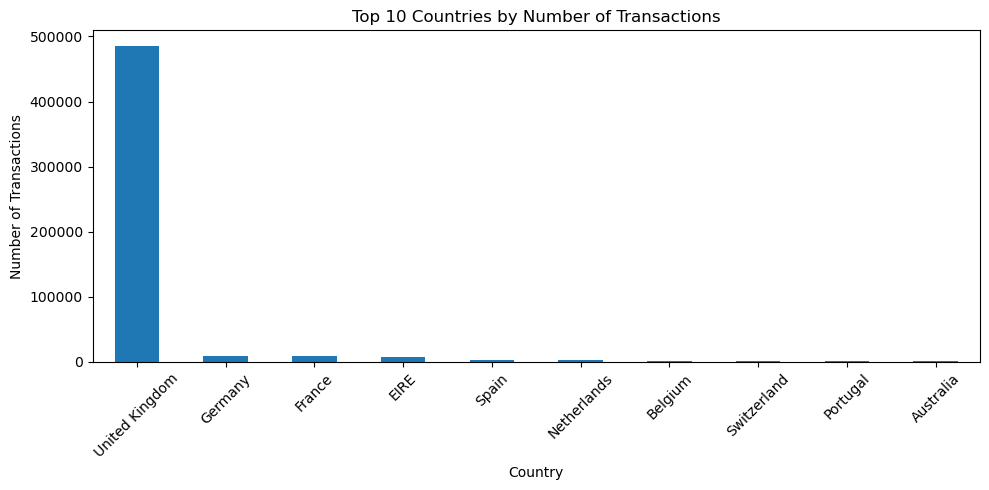

In [41]:
#1️⃣ Transaction Volume by Country
# Transaction count by country
country_txn = df['Country'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
country_txn.head(10).plot(kind='bar')
plt.title("Top 10 Countries by Number of Transactions")
plt.ylabel("Number of Transactions")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

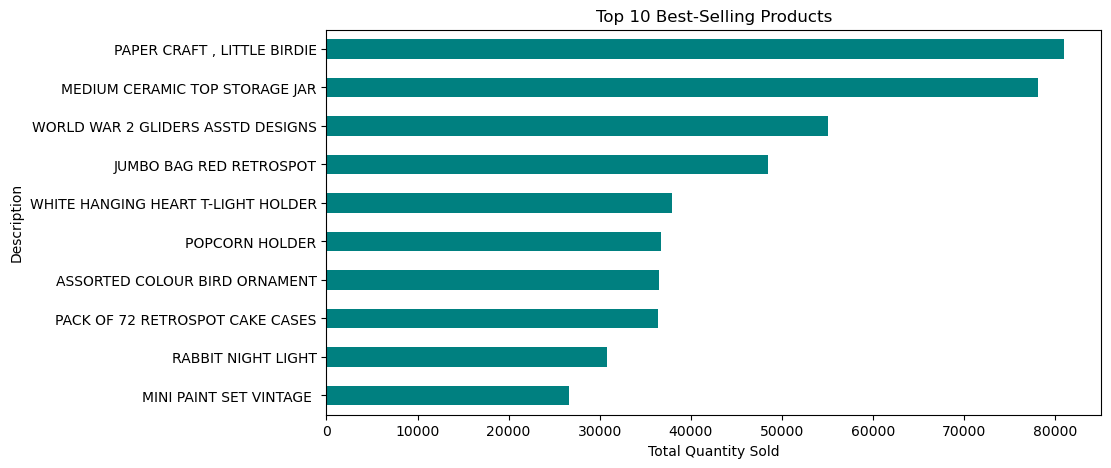

In [45]:
#2️⃣ Top-Selling Products
# Top products by quantity sold
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Plot top 10
top_products.head(10).plot(kind='barh', figsize=(10, 5), color='teal')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.gca().invert_yaxis()
plt.show()

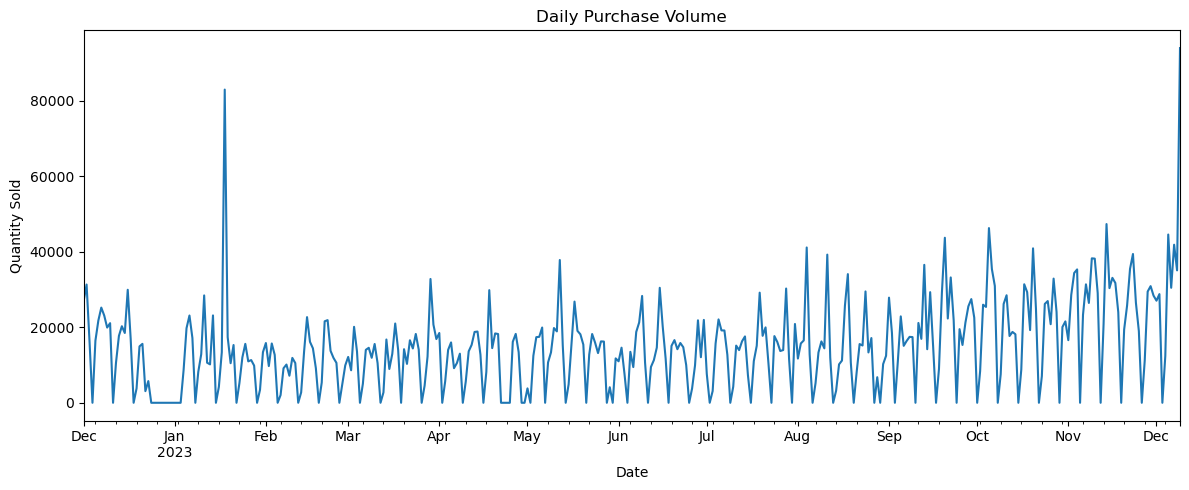

In [47]:
#3️⃣ Purchase Trends Over Time
# Convert to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group by date
daily_sales = df.set_index('InvoiceDate').resample('D')['Quantity'].sum()

# Plot
daily_sales.plot(figsize=(12, 5), title='Daily Purchase Volume')
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.tight_layout()
plt.show()

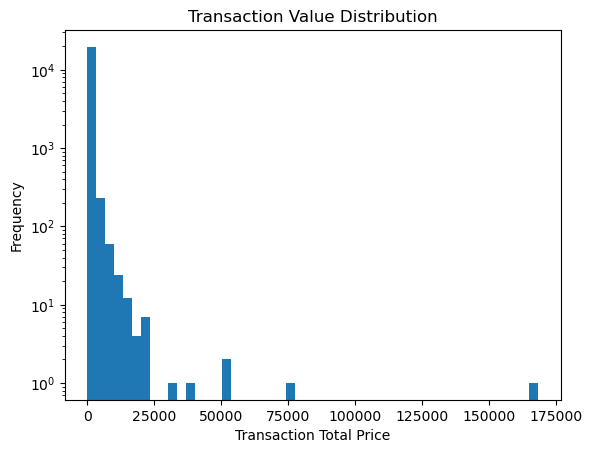

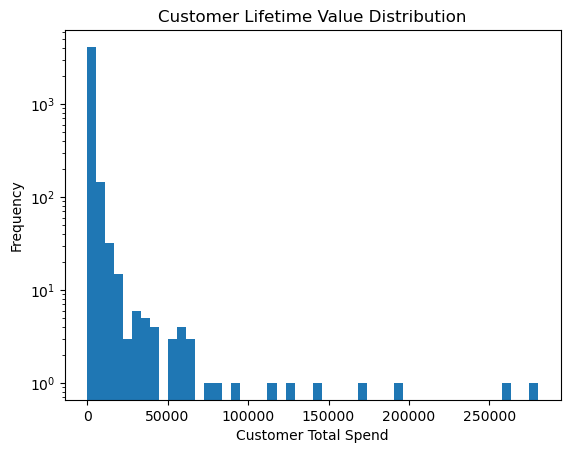

In [49]:
#4️⃣ Monetary Distribution per Transaction & Customer
# Add TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Distribution of transaction values
df.groupby('InvoiceNo')['TotalPrice'].sum().plot(kind='hist', bins=50, title='Transaction Value Distribution', logy=True)
plt.xlabel("Transaction Total Price")
plt.show()

# Distribution per customer
df.groupby('CustomerID')['TotalPrice'].sum().plot(kind='hist', bins=50, title='Customer Lifetime Value Distribution', logy=True)
plt.xlabel("Customer Total Spend")
plt.show()

In [51]:
#5️⃣ RFM Analysis (Recency, Frequency, Monetary)
import datetime as dt

# Set snapshot date (last invoice date + 1)
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

print(rfm.head())


            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40


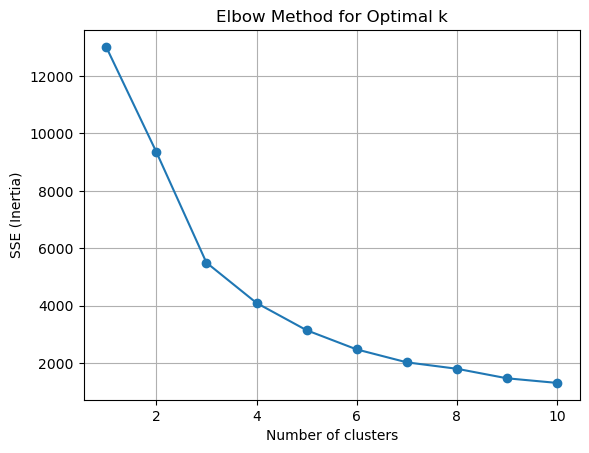

In [53]:
#6️⃣ Elbow Curve for K-Means Cluster Selection
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# Scale RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Elbow curve
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot elbow
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()


            Recency  Frequency       Monetary
Cluster                                      
0         43.702685   3.682711    1359.049284
1        248.075914   1.552015     480.617480
2          7.384615  82.538462  127338.313846
3         15.500000  22.333333   12709.090490


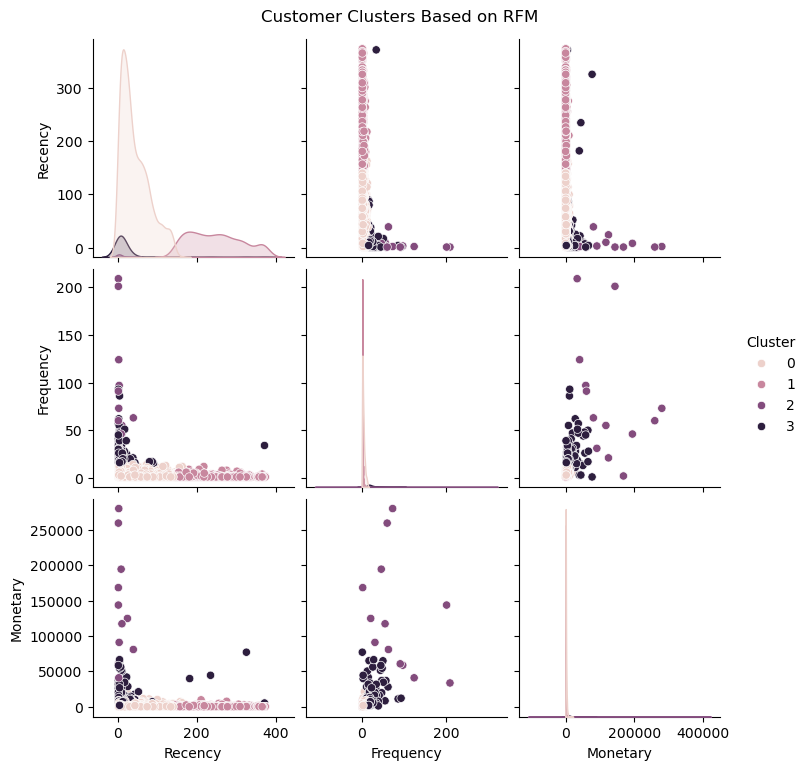

In [55]:
#7️⃣ Customer Cluster Profiles
# Choose optimal cluster number
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Profile by cluster
cluster_profile = rfm.groupby('Cluster').mean()
print(cluster_profile)

# Visualize
sns.pairplot(rfm.reset_index(), hue='Cluster', vars=['Recency', 'Frequency', 'Monetary'])
plt.suptitle("Customer Clusters Based on RFM", y=1.02)
plt.show()


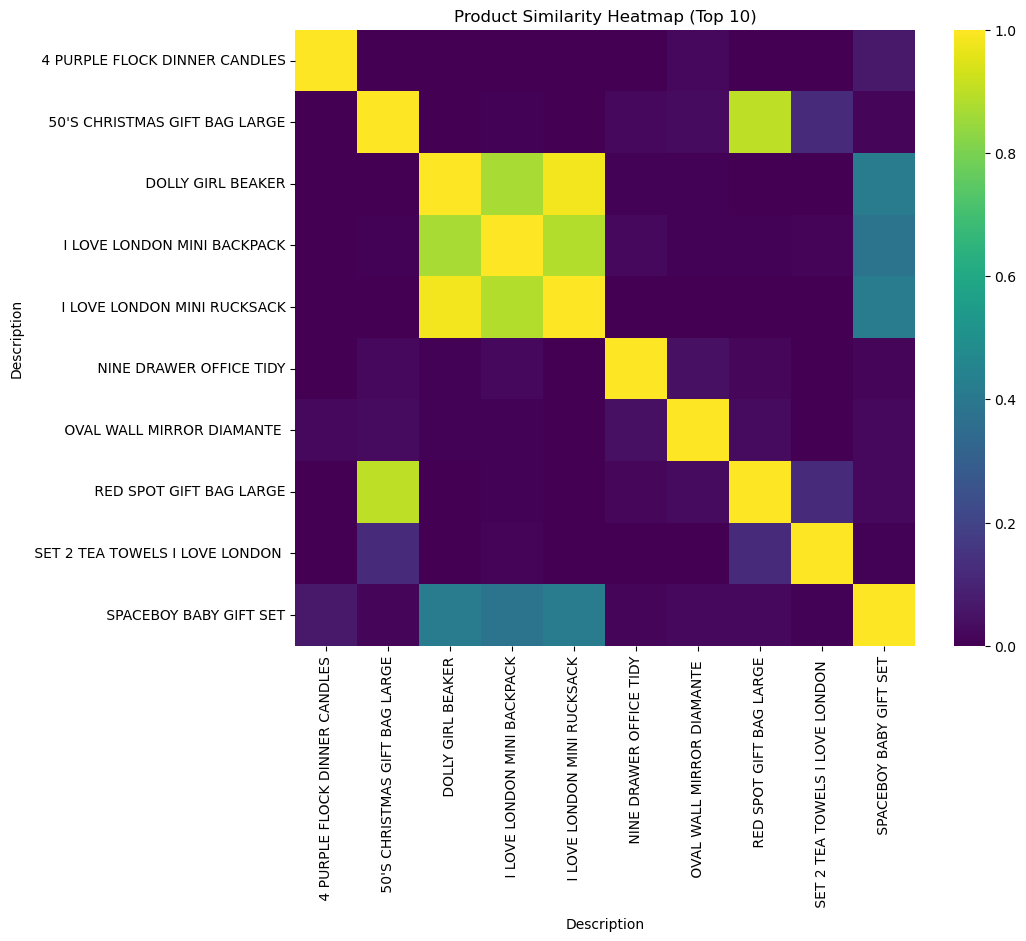

In [57]:
#8️⃣ Product Recommendation Heatmap / Similarity Matrix
# Create product-customer matrix
pivot = df.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)

# Cosine similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

product_similarity = cosine_similarity(pivot.T)
product_sim_df = pd.DataFrame(product_similarity, index=pivot.columns, columns=pivot.columns)

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(product_sim_df.iloc[:10, :10], cmap='viridis')
plt.title("Product Similarity Heatmap (Top 10)")
plt.show()


In [63]:
#Clustering Methodology in Python
#1️⃣ Feature Engineering: RFM Calculation
import pandas as pd
import datetime as dt

# Assume df is cleaned and InvoiceDate is datetime
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [65]:
#2️⃣ Standardize RFM Values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


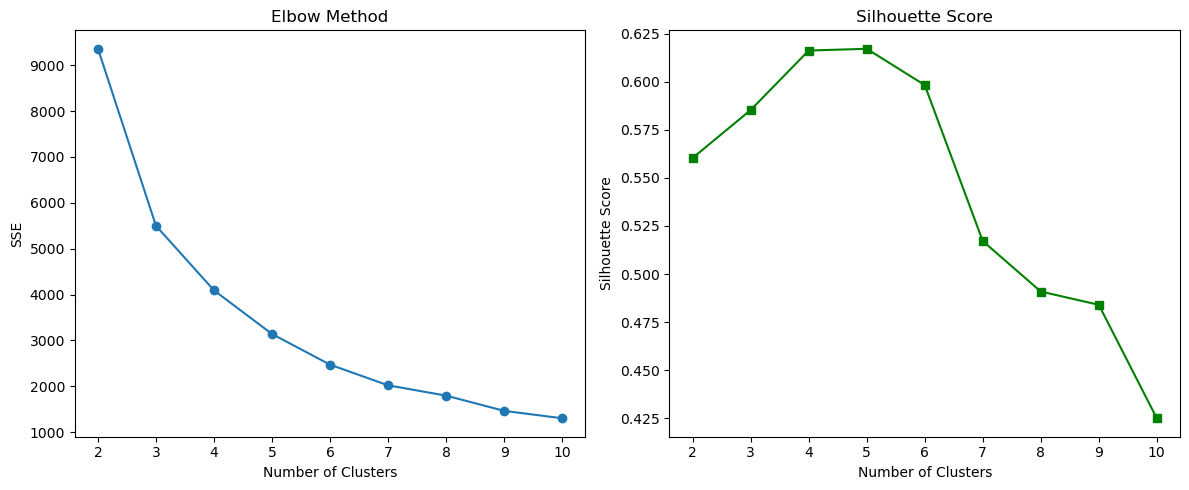

In [67]:
#3️⃣ Choose Clustering Algorithm - Kmeans
#4️⃣ Elbow Method and Silhouette Score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sse = []
sil_scores = []

K = range(2, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    sse.append(model.inertia_)
    sil_scores.append(silhouette_score(rfm_scaled, model.labels_))

# Plot SSE (Elbow)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, marker='s', color='green')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()


In [69]:
#5️⃣ Run KMeans Clustering
# Choose optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Assign Segment Labels based on RFM profile
def label_segment(row):
    if row['Recency'] < rfm['Recency'].median() and row['Frequency'] > rfm['Frequency'].median() and row['Monetary'] > rfm['Monetary'].median():
        return 'High-Value'
    elif row['Frequency'] > rfm['Frequency'].median() and row['Monetary'] > rfm['Monetary'].median():
        return 'Regular'
    elif row['Recency'] > rfm['Recency'].median() and row['Frequency'] < rfm['Frequency'].median():
        return 'At-Risk'
    else:
        return 'Occasional'

rfm['Segment'] = rfm.apply(label_segment, axis=1)

# Cluster summary
print(rfm.groupby(['Cluster', 'Segment'])[['Recency', 'Frequency', 'Monetary']].mean().round(1))


                    Recency  Frequency  Monetary
Cluster Segment                                 
0       At-Risk        84.9        1.0     451.9
        High-Value     18.4        6.2    2388.6
        Occasional     40.9        2.0     549.1
        Regular        83.3        4.8    2001.1
1       At-Risk       264.3        1.0     315.2
        Occasional    217.6        2.3     616.1
        Regular       206.0        4.2    1634.8
2       High-Value      7.9       89.2  123910.5
        Occasional      1.0        2.0  168472.5
3       At-Risk       326.0        1.0   77183.6
        High-Value      8.9       22.8   12184.7
        Regular       156.9       13.7   18182.6


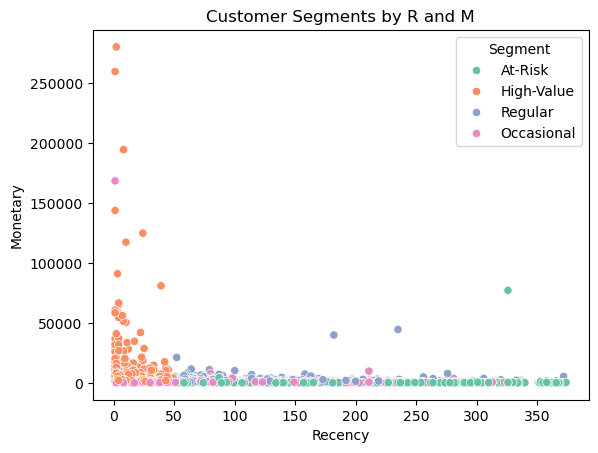

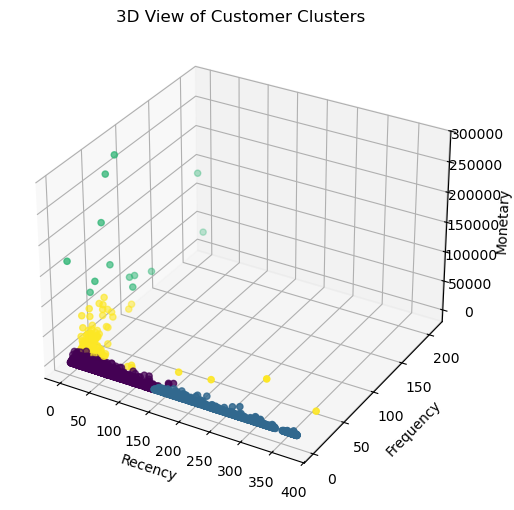

In [71]:
#6️⃣ Visualize the Clusters (2D and 3D)
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# 2D scatter plot
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set2')
plt.title("Customer Segments by R and M")
plt.show()

# 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D View of Customer Clusters')
plt.show()


In [73]:
#7️⃣ Save Best Performing Model 
import joblib

# Save model and scaler
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'rfm_scaler.pkl')

# Optional: Save labeled customer data
rfm.to_csv('rfm_segments.csv', index=False)


In [75]:
#Recommendation System Approach (Item-Based Collaborative Filtering)
#1️⃣ Build the Item-Based Collaborative Filtering Model
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Assume df is cleaned and contains: CustomerID, StockCode, Description, Quantity

# Create product-customer matrix
item_matrix = df.pivot_table(index='Description', columns='CustomerID', values='Quantity', aggfunc='sum', fill_value=0)

# Compute cosine similarity between products
item_similarity = cosine_similarity(item_matrix)
item_similarity_df = pd.DataFrame(item_similarity, index=item_matrix.index, columns=item_matrix.index)

# Save the similarity matrix
item_similarity_df.to_csv('item_similarity.csv')


In [77]:
# 2️⃣ Recommendation Function
def get_similar_products(product_name, similarity_matrix, top_n=5):
    if product_name not in similarity_matrix.index:
        return ["Product not found in database."]
    
    similar_scores = similarity_matrix.loc[product_name].sort_values(ascending=False)
    similar_products = similar_scores.iloc[1:top_n+1].index.tolist()
    return similar_products
